**EDA-1 [Bike Data Set]**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Copy of BIKE DETAILS.csv')

In [ ]:
data.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
data.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


1/- what is range of selling prices in dataset?

In [ ]:
print(data.columns)


Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')


In [ ]:
min_selling_price = data['selling_price'].min()
max_selling_price = data['selling_price'].max()
print(f"The range of selling prices is {min_selling_price} to {max_selling_price}")

The range of selling prices is 5000 to 760000


2/- what is median selling price for bikes in dataset?

In [ ]:
median_selling_price = data['selling_price'].median()
print(f"The median selling price for bikes in the dataset is {median_selling_price}")

The median selling price for bikes in the dataset is 45000.0


3/- what is most common seller type.

In [ ]:
common_type = data['seller_type'].value_counts().idxmax()
print(f"The most common seller type is {common_type}")

The most common seller type is Individual


4/-How many bikes have been driven more than 50,000km.

In [ ]:
Driven_more_than_50000 = (data['km_driven'] > 50000).sum()
print(f"bikes driven more than 50,000km is {Driven_more_than_50000}")

bikes driven more than 50,000km is 170


5/- What is the average km_driven for each owner ship type.

In [ ]:
average_km_driven = data.groupby('owner')['km_driven'].mean()
print(average_km_driven)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


6/- what proportion of bikes are from year 2015 or older.

In [ ]:
older_bikes = (data['year'] >= 2015).sum()
total_bikes = len(data)
proportion_older_bikes = older_bikes / total_bikes
print(f"The proportion of bikes from 2015 or older is {proportion_older_bikes}")

The proportion of bikes from 2015 or older is 0.527803958529689


7/- What is the trend of missing values across the dataset.

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


8/- What is highest ex_showroom price recorded, and for which bike.

In [ ]:
highest_price_bike = data[data['ex_showroom_price'] == data['ex_showroom_price'].max()]
print(highest_price_bike)

                           name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0  


9/- what is total no. of bikes listed by each of the seller.

In [ ]:
total_bikes = data['seller_type'].value_counts()
print(total_bikes)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


10/-What is relationship between selling_price and km_driven for first owner bikes?

In [ ]:

relationship = data[data['owner'] == 'First Owner']['selling_price'].corr(data[data['owner'] == 'First Owner']['km_driven'])
print(relationship)

nan


11/  Identify and Remove Outliers in km_driven using IQR Method

In [ ]:
Q1 = data['km_driven'].quantile(0.25)
Q3 = data['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[(data['km_driven'] >= lower_bound) & (data['km_driven'] <= upper_bound)]
print("filtered_data shape:", filtered_data.shape)
print("original data shape:", data.shape)

filtered_data shape: (1022, 7)
original data shape: (1061, 7)


12/ . Bivariate Analysis: year vs. selling_price

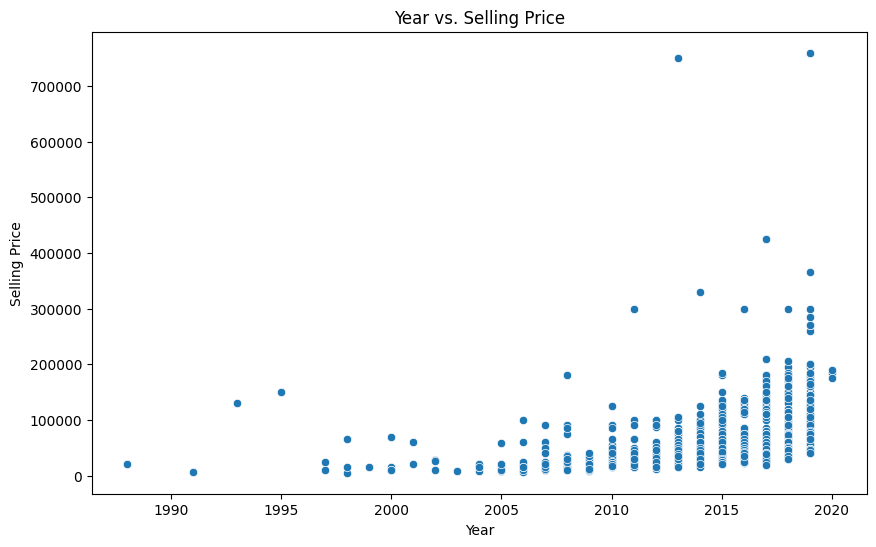

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=data)
plt.title('Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

13/ Average Depreciation Based on Bike's Age

In [ ]:
filtered_data['bike_age'] = 2023 - filtered_data['year']
average_depreciation = filtered_data.groupby('bike_age')['selling_price'].mean()
print(average_depreciation)

bike_age
3     183333.333333
4     119689.511628
5      87660.374046
6      78962.121212
7      57924.126214
8      56313.131313
9      49121.348315
10     51802.816901
11     36157.560606
12     35931.017241
13     32350.877193
14     22934.782609
15     36404.000000
16     27768.181818
17     23821.052632
18     16978.571429
19     16000.000000
20      8000.000000
21     20666.666667
22     40000.000000
23     20833.333333
24     15000.000000
25     28333.333333
26     25000.000000
28    150000.000000
30    130000.000000
32      6000.000000
35     20000.000000
Name: selling_price, dtype: float64


<ipython-input-7-200a4fe4fe99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['bike_age'] = 2023 - filtered_data['year']


14/ Bikes Priced Significantly Above Average for Their Year

In [ ]:
average_price_by_year = filtered_data.groupby('year')['selling_price'].mean()
def is_significantly_above_average(row):
  year_average = average_price_by_year.loc[row['year']]
average_price_by_year = filtered_data.groupby('year')['selling_price'].mean()
def is_significantly_above_average(row):
  year_average = average_price_by_year.loc[row['year']]
  return row['selling_price'] > (1.5 * year_average)

significantly_above_average_bikes_df= filtered_data[filtered_data.apply(is_significantly_above_average, axis=1)]
print(significantly_above_average_bikes_df[['name', 'year', 'selling_price']])


                                     name  year  selling_price
2     Royal Enfield Classic Gunmetal Grey  2018         150000
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
18    Royal Enfield Classic Gunmetal Grey  2018         150000
23                          Jawa Standard  2019         180000
..                                    ...   ...            ...
979             Royal Enfield Thunder 500  2015         105000
981             Royal Enfield Thunder 350  2013         105000
983             Royal Enfield Classic 350  2015         100000
984             Royal Enfield Classic 500  2014          95000
985             Royal Enfield Classic 500  2011          90000

[155 rows x 3 columns]


15/  Correlation Matrix and Heatmap

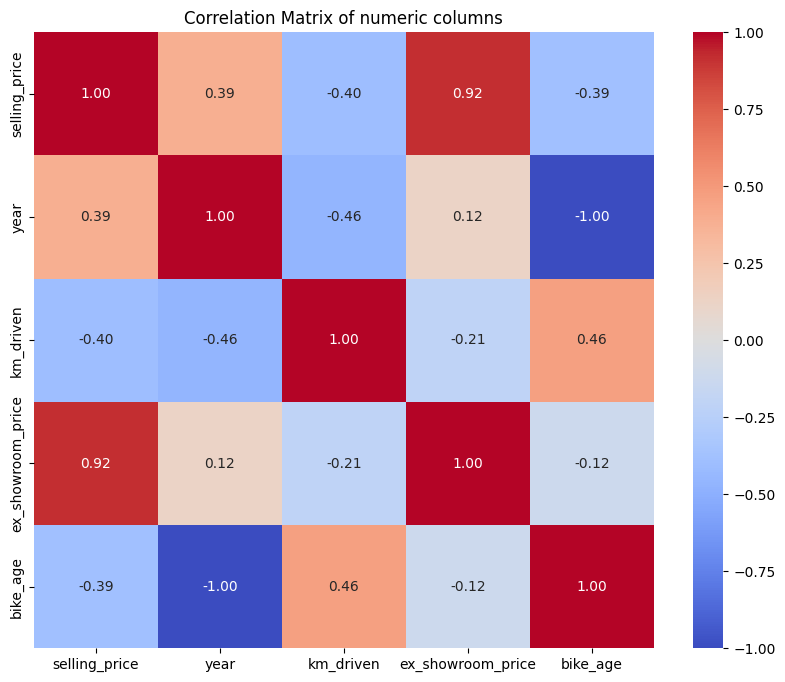

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = filtered_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of numeric columns')
plt.show()



**EDA 2 [Car Sale]**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Car Sale.csv')

In [ ]:
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
data.tail()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin
23905,C_CND_023906,12/31/2023,Donovan,Male,1225000,Pars Auto Sales,Lexus,ES300,DoubleÂ Overhead Camshaft,Auto,Pale White,27500,38701-8047,Hardtop,7020564,Middletown


What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [ ]:
print(data.columns)

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')


-What is the average selling price of cars for each dealer, and how does it compare across different dealers

In [ ]:
average_Price_by_Dealer_Name = data.groupby('Dealer_Name')['Price ($)'].mean()
print(average_Price_by_Dealer_Name)

Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

-Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

In [ ]:
price_variation_by_brand = data.groupby('Company')['Price ($)'].std()
max_variation_brand = price_variation_by_brand.idxmax()
print(f"The car brand with the highest variation in prices is {max_variation_brand}")


The car brand with the highest variation in prices is Lincoln


-What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

                count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max  
Transmission                    
Auto          35500.0  75700.0  
Manual        34000.0  85800.0  


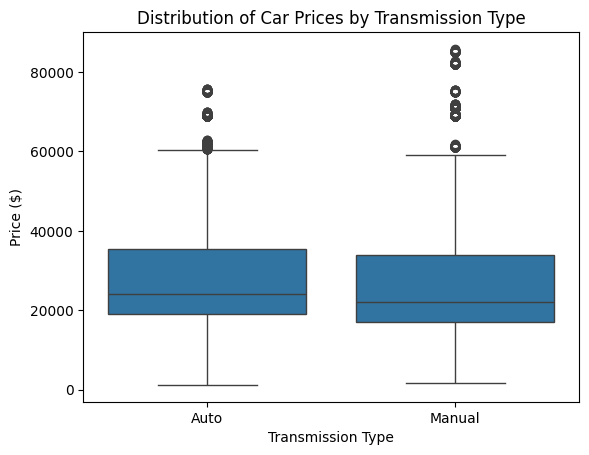

In [ ]:
import pandas as pd

grouped_data = data.groupby('Transmission')
descriptive_stats = grouped_data['Price ($)'].describe()
print(descriptive_stats)

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Transmission', y='Price ($)', data=data)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()

-What is the distribution of car prices across different regions

In [ ]:
import pandas as pd
grouped_data = data.groupby('Dealer_Region')
descriptive_stats = grouped_data['Price ($)'].describe()
print(descriptive_stats)

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

- What is the distribution of cars based on body styles

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


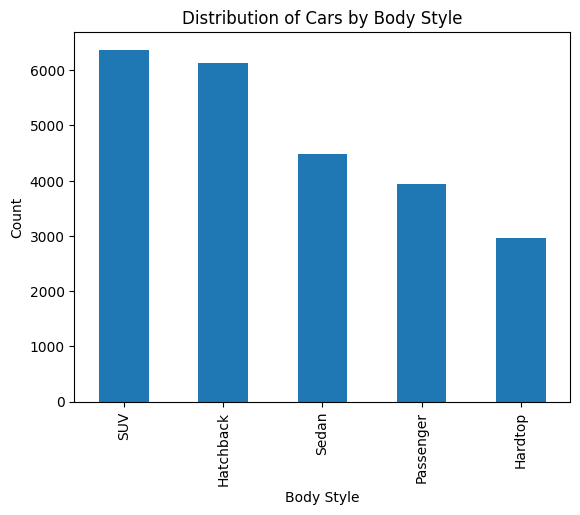

In [ ]:
body_style_counts = data['Body Style'].value_counts()
print(body_style_counts)

import matplotlib.pyplot as plt
body_style_counts.plot(kind='bar')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()

-How does the average selling price of cars vary by customer gender and annual income

In [ ]:
average_price_by_gender_income = data.groupby(['Gender', 'Annual Income'])['Price ($)'].mean()
print(average_price_by_gender_income)

Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64


-What is the distribution of car prices by region, and how does the number of cars sold vary by region

In [ ]:
import pandas as pd
grouped_data = data.groupby('Dealer_Region')
descriptive_stats = grouped_data['Price ($)'].describe()
print(descriptive_stats)



                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

- How does the average car price differ between cars with different engine sizes

In [ ]:
print(data.columns)
average_price_by_engine_size = data.groupby('Engine')['Price ($)'].mean()
print(average_price_by_engine_size)

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


- How do car prices vary based on the customer’s annual income bracket

In [ ]:
import pandas as pd

data['Income Bracket'] = pd.qcut(data['Annual Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
average_price_by_income_bracket = data.groupby('Income Bracket')['Price ($)'].mean()
print(average_price_by_income_bracket)

Income Bracket
Low          27954.276468
Medium       27974.380371
High         28288.664936
Very High    28144.058223
Name: Price ($), dtype: float64


<ipython-input-23-1a444f4cfafe>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_income_bracket = data.groupby('Income Bracket')['Price ($)'].mean()


-What are the top 5 car models with the highest number of sales, and how does their price distribution look

Company     Model     
Mitsubishi  Diamante      418
Chevrolet   Prizm         411
Oldsmobile  Silhouette    411
Volkswagen  Passat        391
Dodge       Ram Pickup    383
Name: Price ($), dtype: int64


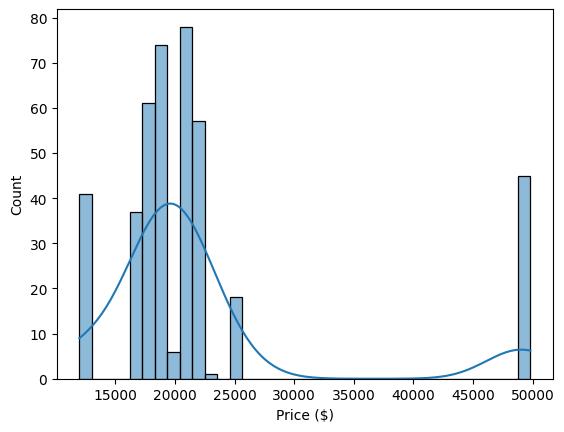

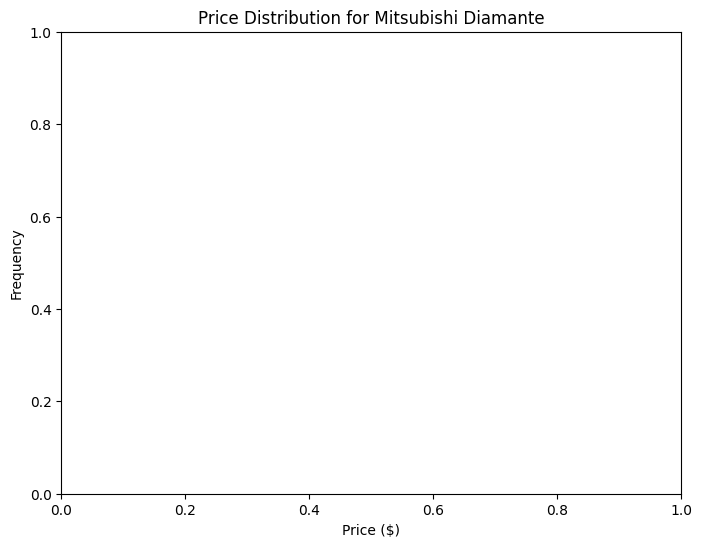

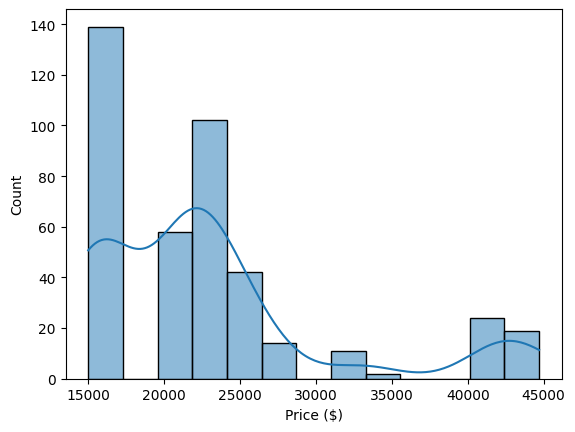

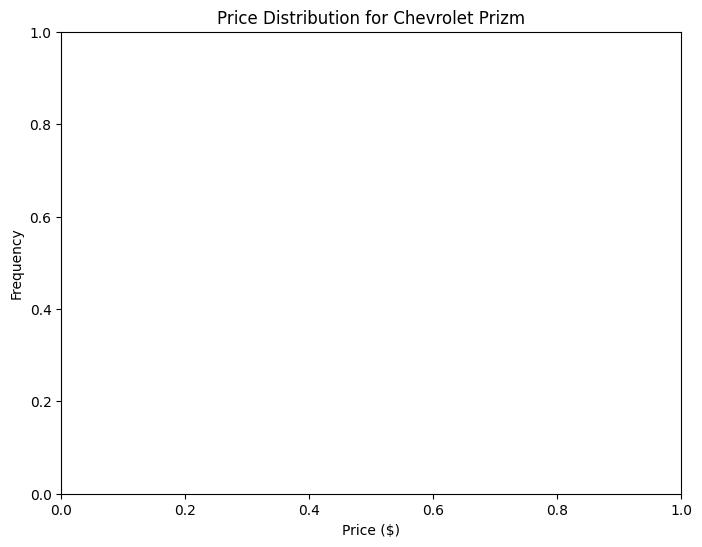

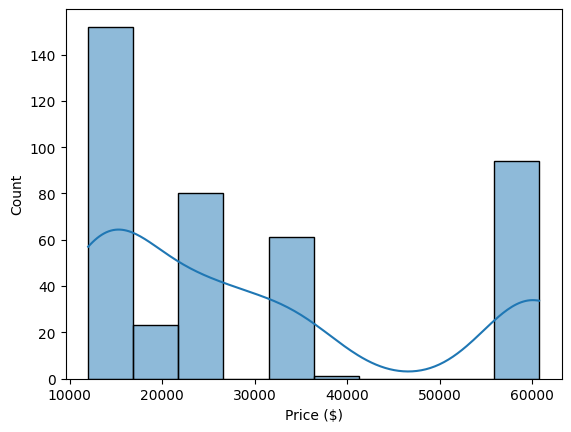

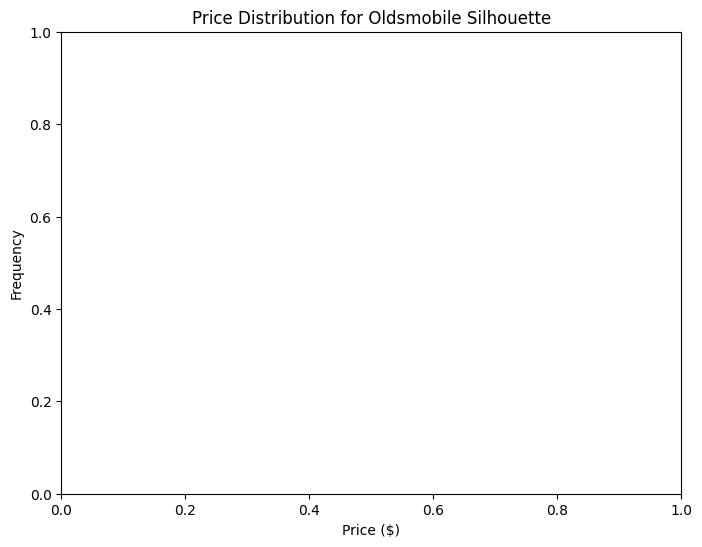

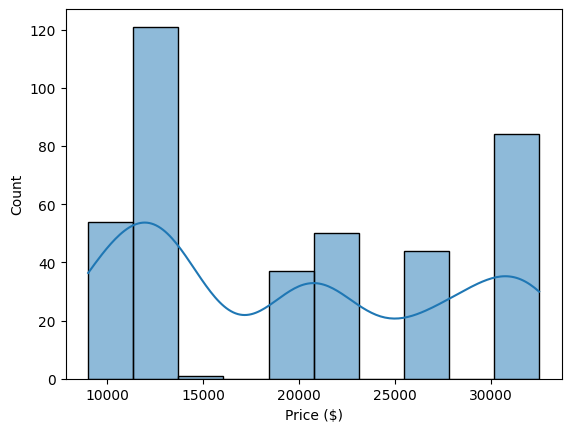

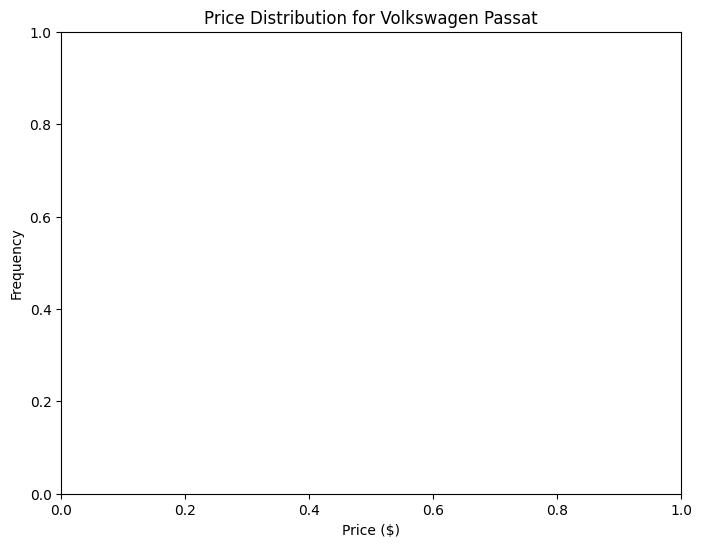

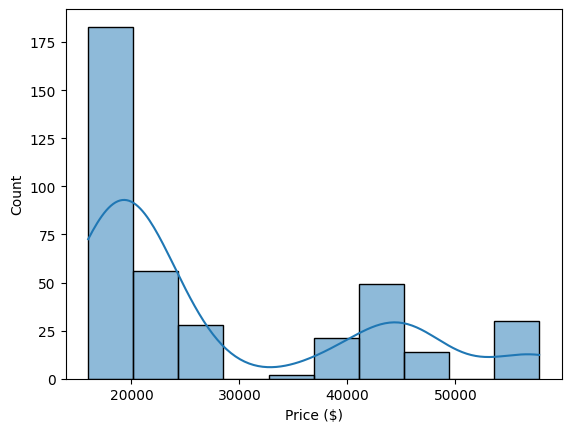

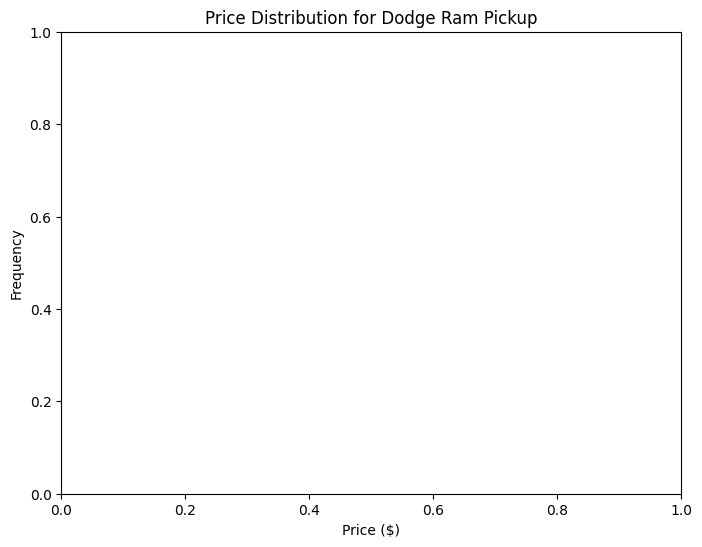

In [ ]:
car_model_sales = data.groupby(['Company', 'Model'])['Price ($)'].count()
top_5_models = car_model_sales.nlargest(5)
print(top_5_models)

import seaborn as sns
import matplotlib.pyplot as plt
for index in top_5_models.index:
  model_data = data[(data['Company'] == index[0]) & (data['Model'] == index[1])]
  sns.histplot(model_data['Price ($)'], kde=True)
  plt.figure(figsize=(8, 6))
  plt.title(f'Price Distribution for {index[0]} {index[1]}')
  plt.xlabel('Price ($)')
  plt.ylabel('Frequency')
  plt.show()



-How does car price vary with engine size across different car colors, and which colors have the highest price variation

Color
Black         28564.798015
Pale White    27483.890370
Red           28736.319007
Name: Price ($), dtype: float64


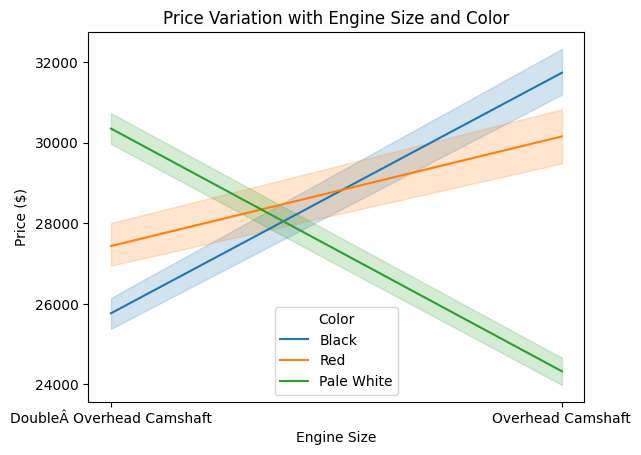

In [ ]:
average_price_by_color = data.groupby('Color')['Price ($)'].mean()
print(average_price_by_color)

import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Engine', y='Price ($)', hue='Color', data=data)
plt.title('Price Variation with Engine Size and Color')
plt.xlabel('Engine Size')
plt.ylabel('Price ($)')
plt.show()

-Is there any seasonal trend in car sales based on the date of sale

In [ ]:
import pandas as pd
data['Date of Sale'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date of Sale'].dt.month
monthly_sales = data.groupby('Month')['Price ($)'].count()
print(monthly_sales)



Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: Price ($), dtype: int64


-How does the car price distribution change when considering different combinations of body style and transmission type

In [ ]:
grouped_data = data.groupby(['Body Style', 'Transmission'])
descriptive_stats = grouped_data['Price ($)'].describe()
print(descriptive_stats)

                          count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.0  19001.0   

                           

-What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

               Price ($)  Engine  Annual Income
Price ($)       1.000000     NaN       0.012065
Engine               NaN     NaN            NaN
Annual Income   0.012065     NaN       1.000000


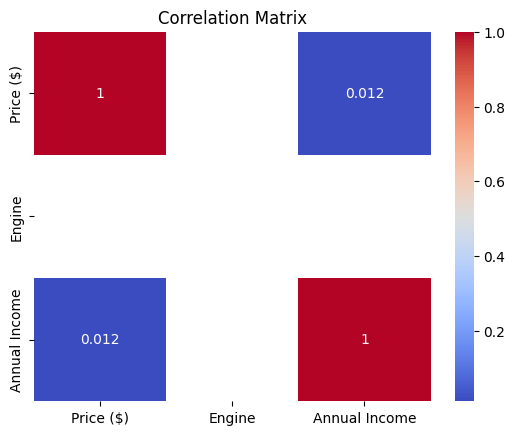

In [ ]:
import pandas as pd

data['Engine'] = pd.to_numeric(data['Engine'], errors='coerce')
data['Annual Income'] = pd.to_numeric(data['Annual Income'], errors='coerce')

features = ['Price ($)', 'Engine', 'Annual Income']
data_subset = data[features]
correlation_matrix = data_subset.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

-How does the average car price vary across different car models and engine types

In [ ]:
print(data.columns)

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Bracket', 'Date of Sale', 'Month'],
      dtype='object')


Series([], Name: Price ($), dtype: float64)


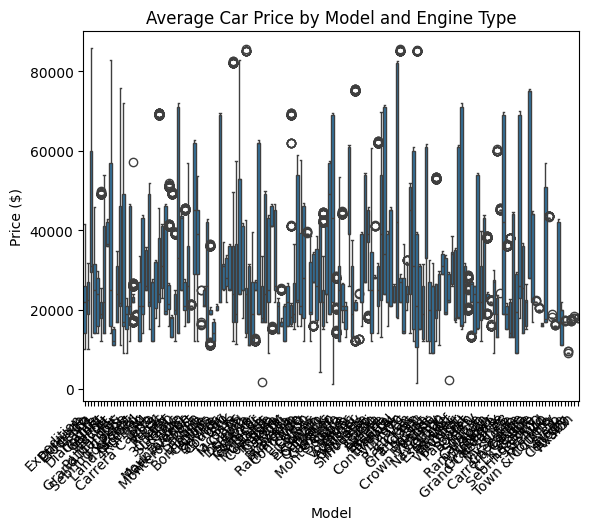

In [ ]:
grouped_data = data.groupby(['Model', 'Engine'])
average_price_by_model_engine = grouped_data['Price ($)'].mean()
print(average_price_by_model_engine)

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Model', y='Price ($)', data=data)
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

**EDA-3 [Amazon sale data]**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Data/amazon.csv')

In [ ]:
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
data.tail()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,4.3,"6,987","Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...","Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...","R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...


In [ ]:
print(data.columns)

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


-What is the average rating for each product category

In [ ]:
average_rating_by_category = data.groupby('category')['rating'].mean()
print(average_rating_by_category)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

-What are the top rating_count products by category

In [ ]:
import pandas as pd

data['rating_count'] = pd.to_numeric(data['rating_count'], errors='coerce')

top_products_by_category = data.groupby(['category', 'product_id'])['rating_count'].max().reset_index()

top_products_by_category = top_products_by_category.sort_values(['category', 'rating_count'], ascending=[True, False])

top_products = top_products_by_category.groupby('category').first().reset_index()

# Display the results
print(top_products[['category', 'product_id', 'rating_count']])


                                              category  product_id  \
0    Car&Motorbike|CarAccessories|InteriorAccessori...  B0912WJ87V   
1    Computers&Accessories|Accessories&Peripherals|...  B094DQWV9B   
2    Computers&Accessories|Accessories&Peripherals|...  B009LJ2BXA   
3    Computers&Accessories|Accessories&Peripherals|...  B08HD7JQHX   
4    Computers&Accessories|Accessories&Peripherals|...  B08K9PX15C   
..                                                 ...         ...   
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  B07KCMR8D6   
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  B00S2SEV7K   
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  B00LM4W1N2   
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  B00LZPQVMK   
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  B00DJ5N9VK   

     rating_count  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
..            ...  
206           NaN  

-' What is the distribution of discounted prices vs. actual prices

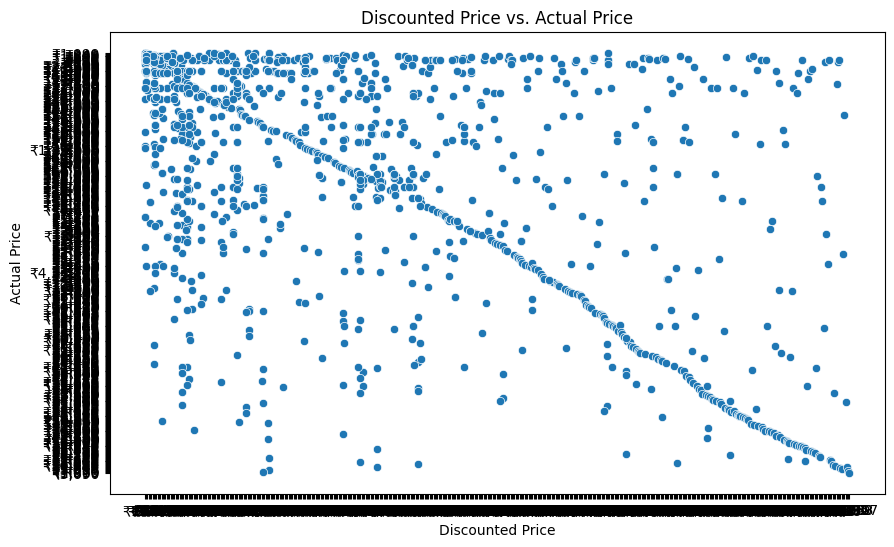

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='actual_price', data=data)
plt.title('Discounted Price vs. Actual Price')
plt.xlabel('Discounted Price')
plt.ylabel('Actual Price')
plt.show()

-How does the average discount percentage vary across categories

In [ ]:
data['actual_price'] = pd.to_numeric(data['actual_price'].astype(str).str.replace(',', '').str.replace('₹', '').str.replace('$', ''), errors='coerce')
data['discounted_price'] = pd.to_numeric(data['discounted_price'].astype(str).str.replace(',', '').str.replace('₹', '').str.replace('$', ''), errors='coerce')

# Now calculate the discount percentage
data['discount_percentage'] = ((data['actual_price'] - data['discounted_price']) / data['actual_price']) * 100
average_discount_by_category = data.groupby('category')['discount_percentage'].mean()
print(average_discount_by_category)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPen

-What are the most popular product names

In [ ]:
product_name_counts = data['product_name'].value_counts()
top_10_product_names = product_name_counts.head(10)
print(top_10_product_names)

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                      4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)    3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                       3
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                                             

-What are the most popular product keywords

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize


data['keywords'] = data['product_name'].apply(lambda x: word_tokenize(x))

from collections import Counter

all_keywords = [keyword for sublist in data['keywords'] for keyword in sublist]
keyword_frequencies = Counter(all_keywords)

top_keywords = keyword_frequencies.most_common(10)  # Change 10 to get a different number of top keywords
print(top_keywords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[(',', 3094), ('(', 1211), (')', 1202), ('with', 718), ('for', 616), ('Black', 495), ('|', 463), ('&', 439), ('Cable', 385), ('USB', 354)]


-What are the most popular product reviews

In [ ]:
data['rating_count'] = pd.to_numeric(data['rating_count'], errors='coerce')

# Sort and select
top_reviews = data.sort_values(by=['rating_count'], ascending=False).head(10)

# Display results
print(top_reviews[['product_name', 'rating_count', 'rating']])


                                           product_name  rating_count  rating
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0     NaN
750        Eveready Red 1012 AAA Batteries - Pack of 10         989.0     4.3
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0     3.7
151   Zoul USB Type C Fast Charging 3A Nylon Braided...         974.0     4.3
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0     4.3
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0     4.3
1272  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...         959.0     3.9
1259  Hindware Atlantic Xceed 5L 3kW Instant Water H...         942.0     3.9
214   Crypo™ Universal Remote Compatible with Tata S...         928.0     3.8
1262  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...         925.0     4.1


- What is the correlation between discounted_price and rating

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Remove currency symbols and commas, then convert to numeric
data['discounted_price'] = pd.to_numeric(data['discounted_price'].astype(str).str.replace(',', '').str.replace('₹', '').str.replace('$', ''), errors='coerce')

price_rating_data = data[['discounted_price', 'rating']]
correlation = price_rating_data['discounted_price'].corr(price_rating_data['rating'])
print(f"The correlation between discounted_price and rating is: {correlation}")

The correlation between discounted_price and rating is: 0.12033741712288548


-' What are the Top 5 categories based on the highest rating

In [ ]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Group by 'category' and calculate the mean rating for each category
average_rating_by_category = data.groupby('category')['rating'].mean()

# Sort the categories by average rating in descending order
sorted_categories = average_rating_by_category.sort_values(ascending=False)

# Select the top 5 categories
top_5_categories = sorted_categories.head(5)

# Print the results
print(top_5_categories)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64


-Identify any potential areas for improvement or optimization based on the data analysis

Potential Areas for Improvement/Optimization:

Focus on High-Rated Categories: The analysis revealed the top 5 categories with the highest average ratings. This information can be used to focus marketing and sales efforts on these popular categories.

Improve Low-Rated Categories: Consider investigating categories with lower average ratings. Analyze product reviews and customer feedback to identify specific areas for improvement in product quality, features, or customer service.

Optimize Pricing Strategies: Study the relationship between discounted price and rating. Consider adjusting pricing strategies to balance product attractiveness and profitability while maintaining or improving customer satisfaction.

Keyword Optimization: Identify popular product keywords and reviews. Use these insights to refine product descriptions, titles, and advertising campaigns to better target customer search terms and interests.

Improve Product Discoverability: Analyze product names and keywords. This can help optimize product visibility and search ranking on the platform, increasing the chances of products being discovered by potential customers.

Address Missing Values: Ensure that the dataset is complete and accurate by handling missing values. Impute missing values or consider excluding them from analysis to improve the reliability of findings.

Monitor Discount Effectiveness: Regularly track the discount percentages across categories to ensure they align with overall sales strategies and profitability targets. Adjust discounts as needed to optimize sales and customer engagement.

**EDA-4 [Spotify Dataset]**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Data/spotify.csv')


In [ ]:
data.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [ ]:
data.tail()

,Artist,Track Name,Popularity,Duration (ms),Track ID
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6
439,Rick Ross,Stay Schemin,68,267720,0nq6sfr8z1R5KJ4XUk396e


In [ ]:
print(data.columns)

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


 -Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

In [ ]:
data.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
actual_column_name = 'Track Name'  # example
data[actual_column_name].fillna('Unknown', inplace=True)


data[actual_column_name].fillna(method='ffill', inplace=True)
data[actual_column_name].fillna(method='bfill', inplace=True)

data.duplicated().sum()  # Use duplicated() instead of duplicate()
data.drop_duplicates(inplace=True)

<ipython-input-30-a8bd0f268434>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[actual_column_name].fillna(method='ffill', inplace=True)
<ipython-input-30-a8bd0f268434>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[actual_column_name].fillna(method='bfill', inplace=True)


 -What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


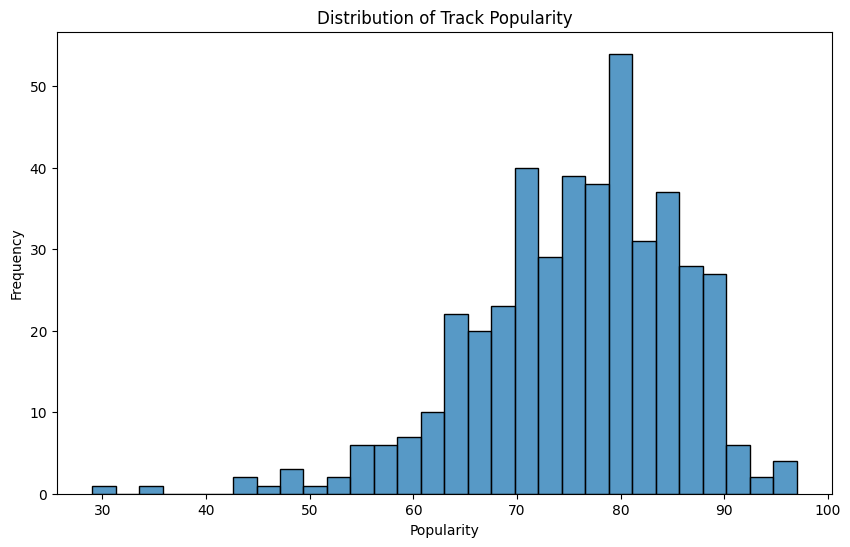

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(data.columns)

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.histplot(data['Popularity'], bins=30, kde=False)  # Use 'popularity' column, adjust bins as needed
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()



- Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

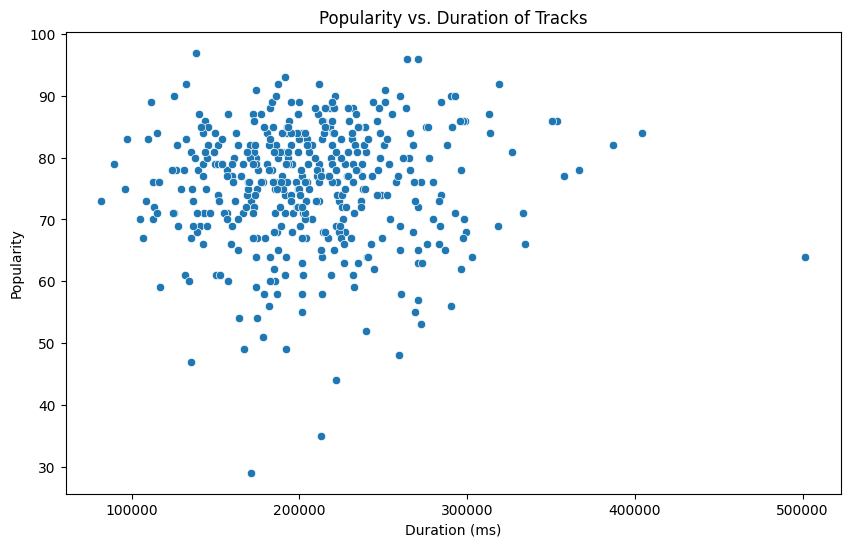

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x='Duration (ms)', y='Popularity', data=data)
plt.title('Popularity vs. Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()



-Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a count plot.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
artist_track_counts = data['Artist'].value_counts()
artist_with_most_tracks = artist_track_counts.index[0]
print(f"The artist with the most tracks is: {artist_with_most_tracks}")



The artist with the most tracks is: Drake


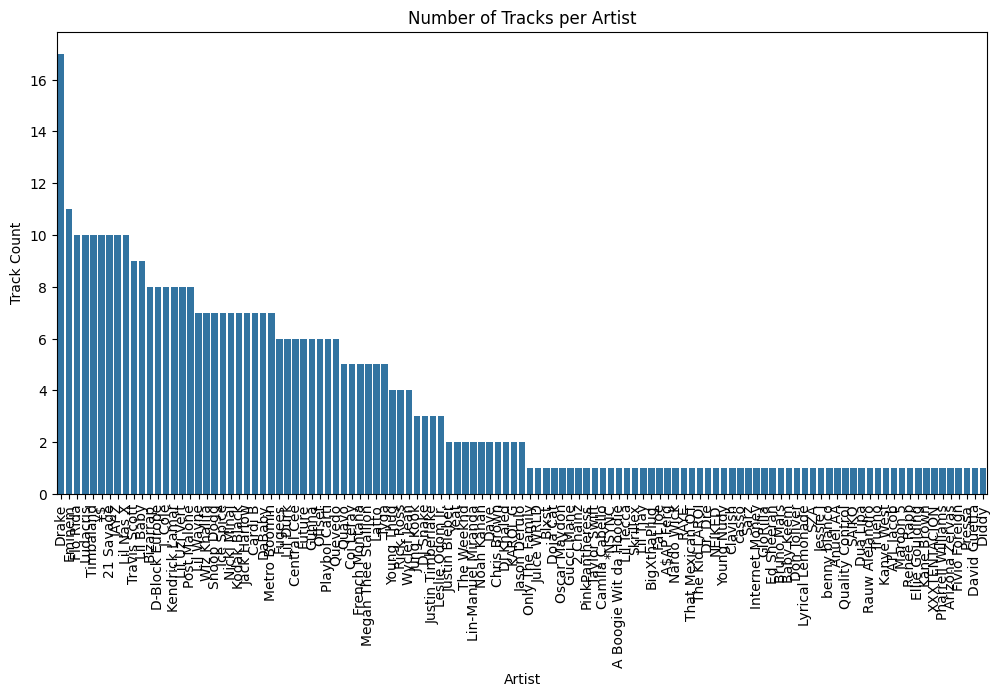

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.countplot(x='Artist', data=data, order=artist_track_counts.index)
plt.title('Number of Tracks per Artist')
plt.xlabel('Artist')
plt.ylabel('Track Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

-What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [ ]:
least_popular_tracks = data.sort_values(by=['Popularity']).head(5)
print(least_popular_tracks[['Artist', 'Track Name']])

             Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix
407     Wyclef Jean      911 (feat. Mary J. Blige)


-Average Popularity for Top 5 Most Popular Artists

In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame called 'data'
top_5_artists = data['Artist'].value_counts().head(5).index.tolist()  # Get top 5 artists
average_popularity = data[data['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean()
print(average_popularity)

highest_avg_popularity_artist = average_popularity.idxmax()
print(f"\nThe artist with the highest average popularity among the top 5 is: {highest_avg_popularity_artist}")

Artist
Drake        82.882353
Eminem       83.636364
Flo Rida     78.000000
Ludacris     63.000000
Timbaland    69.000000
Name: Popularity, dtype: float64

The artist with the highest average popularity among the top 5 is: Eminem


- Most Popular Tracks for Top 5 Artists

In [ ]:
for artist in top_5_artists:
    most_popular_track = data[data['Artist'] == artist].sort_values(by=['Popularity'], ascending=False).iloc[0]['Track Name']
    print(f"Most popular track for {artist}: {most_popular_track}")

Most popular track for Drake: Rich Baby Daddy (feat. Sexyy Red & SZA)
Most popular track for Eminem: Without Me
Most popular track for Flo Rida: Low (feat. T-Pain)
Most popular track for Ludacris: My Chick Bad
Most popular track for Timbaland: The Way I Are


-Visualize Relationships Using a Pair Plot

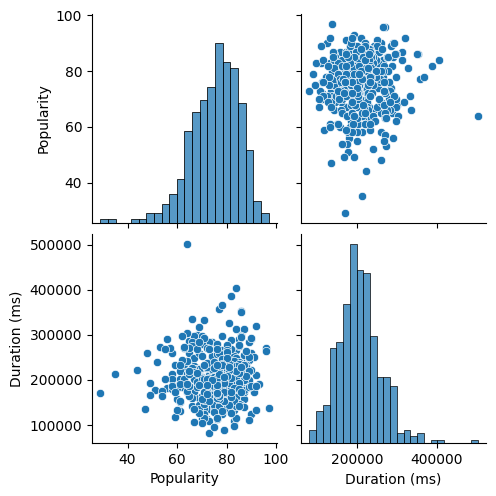

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Popularity', 'Duration (ms)']
sns.pairplot(data[numerical_cols])
plt.show()

In [ ]:
print(data.columns)

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


- Track Duration Variation Across Artists (Box Plot)

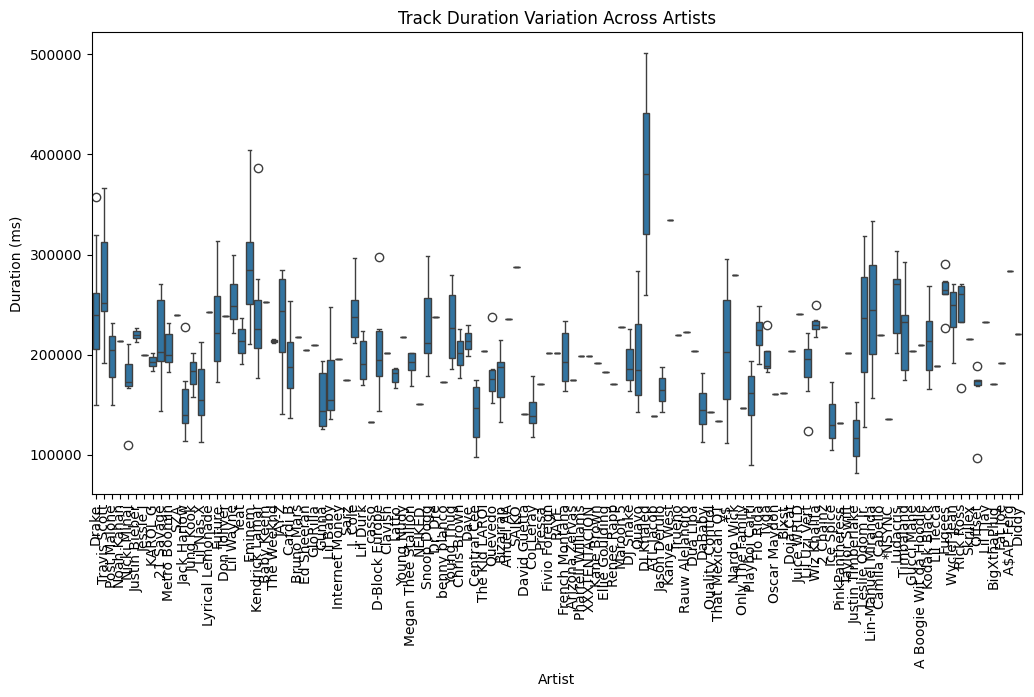

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust size as needed
sns.boxplot(x='Artist', y='Duration (ms)', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title('Track Duration Variation Across Artists')
plt.show()

-Track Popularity Distribution for Different Artists (Swarm Plot)

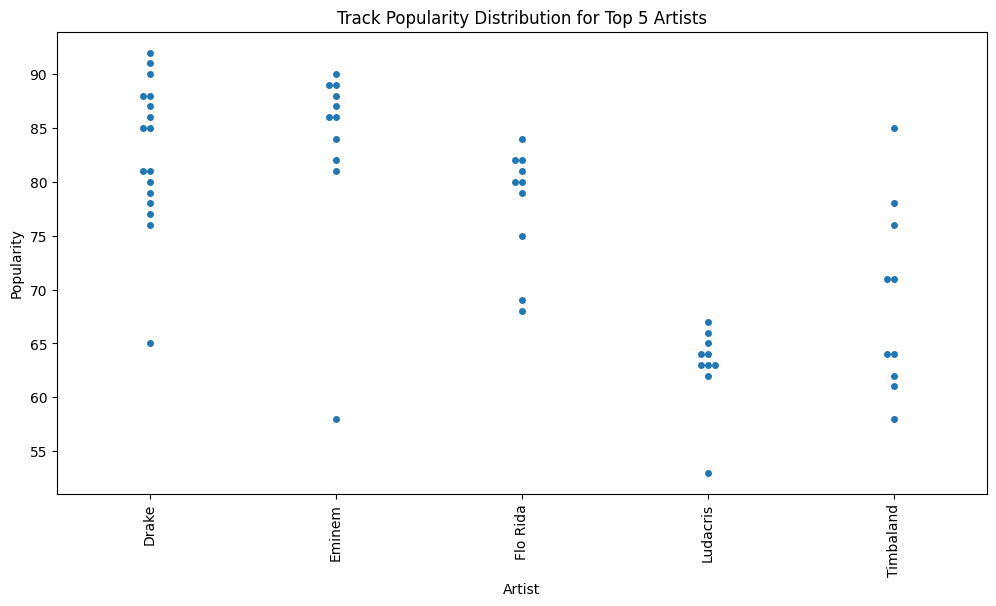

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust size as needed
sns.swarmplot(x='Artist', y='Popularity', data=data[data['Artist'].isin(top_5_artists)])  # Filter for top 5
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title('Track Popularity Distribution for Top 5 Artists')
plt.show()